### Import Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

### Set Campaign Parameters (From R/F Tool)

In [45]:
campaign_spend = 8_909_863  # User-defined spend level 
campaign_reach = 0.9135  # Known reach at this spend level (50%)
campaign_frequency = 9.75  # Known frequency at this spend level
campaign_impressions = 570_781_182 # Known impressions at this spend level
audience_size = 68_608_389  # Total audience size
max_reach = 0.967  # Maximum possible reach (e.g., 90% of audience)
CPM = 14.63  # Cost per 1000 impressions (should back into spend and impressions)

### Calculate Estimates for PDR Curve

In [49]:
# Estimates the effieciency factor for reach growth
k_estimated = -np.log(1 - (campaign_reach / max_reach)) / campaign_spend

# Generates 100 evenly spaced spend levels between 1 and 35,000,000
spend_levels = np.linspace(1, 25_000_000, 100) 

# Calculates estimated reach using the efficiency factor
estimated_reach = max_reach * (1 - np.exp(-k_estimated * spend_levels))
estimated_reach = np.minimum(estimated_reach, max_reach)

# Calculate estimated frequency
estimated_impressions = (spend_levels / CPM) * 1000
estimated_trps = (estimated_impressions / audience_size) * 100
estimated_frequency = np.divide(estimated_impressions, 
                                (audience_size * estimated_reach), 
                                out=np.zeros_like(estimated_impressions), 
                                where=estimated_reach != 0)

### Calculate PDR Point 

In [50]:
# Calculate PDR values
reach_deltas = np.diff(estimated_reach)
pdr_threshold = 0.1 * np.max(reach_deltas)
pdr_index_diff = np.argmax(reach_deltas < pdr_threshold)
pdr_index = pdr_index_diff + 1  
pdr_spend = spend_levels[pdr_index]
pdr_reach = estimated_reach[pdr_index]

# Create a dataframe to store the results
pdr_df = pd.DataFrame({
    "Spend ($)": spend_levels,
    "Est. Reach": estimated_reach * 100,
    "Est. Frequency": estimated_frequency
})

### Map PDR Curve

,Spend ($),Est. Reach,Est. Frequency
0,1.000000e+00,0.000031,3.171371
1,2.525262e+05,7.616328,3.303234
2,5.050515e+05,14.632749,3.438652
3,7.575767e+05,21.096541,3.577617
4,1.010102e+06,27.051232,3.720117


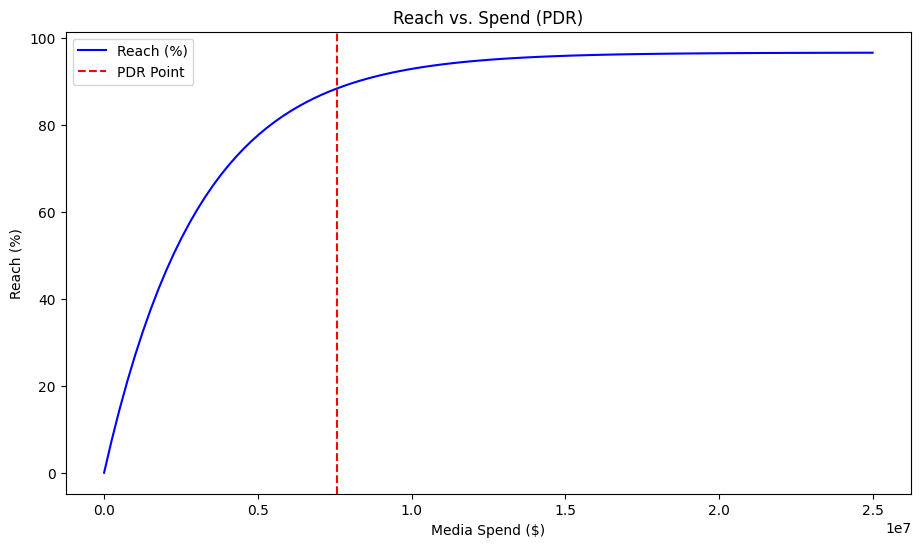

In [51]:
# Step 9: Plot PDR Curve
plt.figure(figsize=(24, 6))

# Reach vs. Spend
plt.subplot(1, 2, 1)
plt.plot(spend_levels, estimated_reach * 100, label="Reach (%)", color="blue")
plt.axvline(x=pdr_spend, linestyle="--", color="red", label="PDR Point")
plt.xlabel("Media Spend ($)")
plt.ylabel("Reach (%)")
plt.title("Reach vs. Spend (PDR)")
plt.legend()


# Step 10: Display DataFrame
pdr_df.head()
